<a href="https://colab.research.google.com/github/cagBRT/PerformanceEnhancement/blob/main/Large_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Clone the entire repo.
!git clone -l -s https://github.com/cagBRT/PerformanceEnhancement.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 466.11 KiB | 10.84 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/cloned-repo/cloned-repo
NumpyDataTypes.png  Pandas_Performance_Enhancement.ipynb  README.md


In [23]:
from IPython.display import Image

1. Download the dataset here:

In [24]:
#https://www.kaggle.com/competitions/tabular-playground-series-sep-2021/rules

2. It will be be in zip format. <br>
Unzip the folder

3. Upload using file upload:<br>
>tabular-playground-series-sep-2021/train.csv<br>
>tabular-playground-series-sep-2021/test.csv


4. Wait for the upload to finish. <br>
This can take about 25 minutes

In [25]:
!python3 -m pip install -U pip
!python3 -m pip install -U datatable
import pandas as pd

In [26]:
import numpy as np
import datatable as dt

In [45]:
%%time
tps_dt = dt.fread("/content/train.csv").to_pandas()
tps_dt.head()

CPU times: user 7.42 s, sys: 893 ms, total: 8.31 s
Wall time: 7.07 s


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,True
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,False
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,True
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,True
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,True


In [47]:
%%time

tps_df = pd.read_csv("/content/train.csv")
tps_df.head()

CPU times: user 19 s, sys: 993 ms, total: 20 s
Wall time: 20.1 s


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


7 times speedup! The datatable API for manipulating data may not be as intuitive as pandas - so, call the to_pandas method after reading the data to convert it to a DataFrame.

Apart from datatable, there are Dask, Vaex, or cuDF, etc. that read data multiple times faster than pandas.

# Reduce the memory size

Even a 200k row dataset may exhaust your 16GB RAM while doing complex computations.

In [29]:
memory_usage = tps_df.memory_usage(deep=True) / 1024 ** 2
memory_usage.head(7)

Index    0.000122
id       1.640949
f1       0.820475
f2       0.820475
f3       0.820475
f4       0.820475
f5       0.820475
dtype: float64

In [30]:
memory_usage.sum()

118.14846801757812

Now, there are certain tricks you can use to decrease memory usage up to 90%. These tricks have a lot to do with changing the data type of each feature to the smallest subtype possible.

Python represents various data with unique types such as int, float, str, etc. In contrast, pandas has several NumPy alternatives for each of Python's:



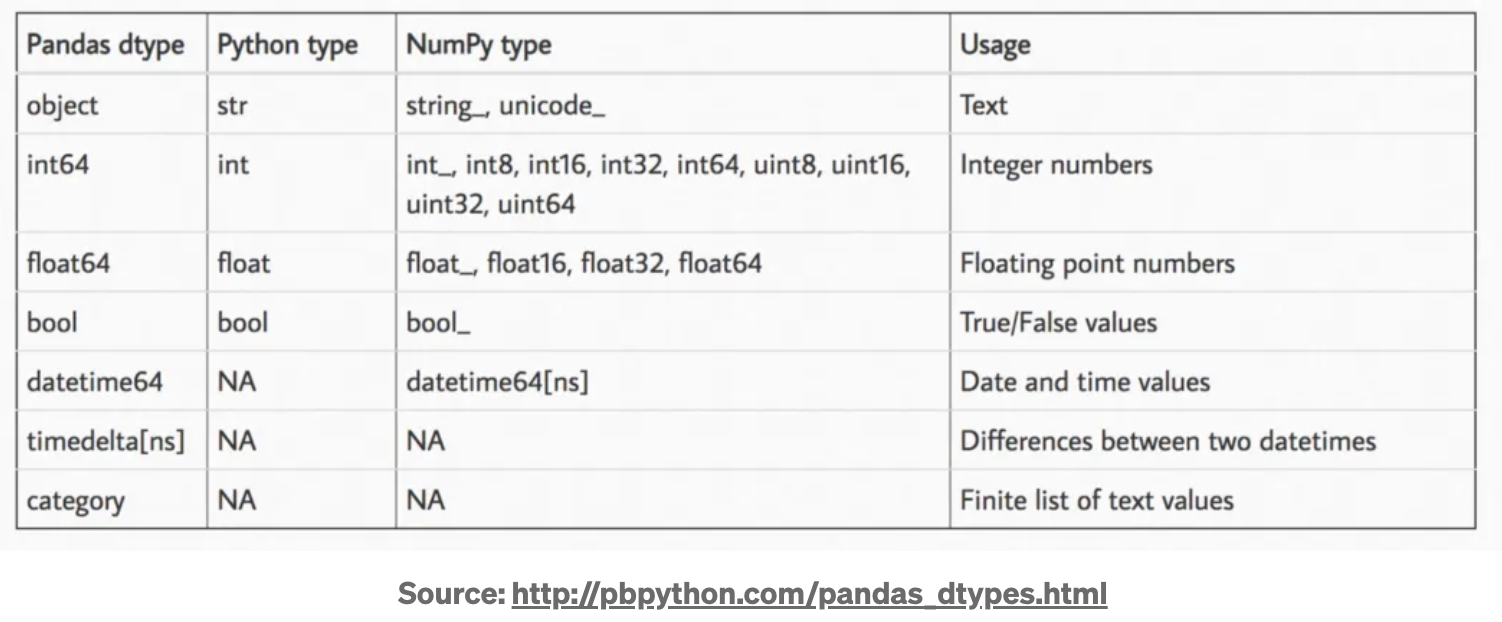

In [31]:
Image("/content/cloned-repo/NumpyDataTypes.png")

Numbers next to the datatype refer to how many bits of memory a single data unit consumes when represented in that format. To reduce the memory as much as possible, choose the smallest NumPy data format.

Using the memory_usage method on a DataFrame with deep=True, we can get the exact estimate of how much RAM each feature is consuming - 7 MBs. Overall, it is close to 1GB.

In the above table, uint refers to unsigned, only positive integers. I have found this handy function that reduces the memory of pandas DataFrames based on the above table (shout out to this Kaggle kernel):

Based on the minimum and maximum value of a numeric column and the above table, the function converts it to the smallest subtype possible. Let’s use it on our data:

In [32]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [33]:
reduced_df = reduce_memory_usage(tps_df, verbose=True)

Mem. usage decreased to 118.15 Mb (0.0% reduction)


70% memory reduction is pretty impressive. However, please note that memory reduction won’t speed up computation in most cases. If the memory size is not an issue, you can skip this step.

Regarding non-numeric data types, never use the object datatype in Pandas as it consumes the most memory. Either use str or category if there are few unique values in the feature. In fact, using pd.Categorical data type can speed things up to 10 times while using LightGBM's default categorical handler.

# Choose a data manipulation library

Up until this point, I mainly mentioned pandas. It might be slow, but the vast range of data manipulation functions gives it a mounting advantage over its competitors.



datatable allows multi-threaded preprocessing of datasets sized up to 100 GBs. At such scales, pandas starts throwing memory errors while datatable humbly executes. You can read this excellent article by
Parul Pandey
 for an intro to the package.

Another alternative is cuDF, developed by RAPIDS. This package has many dependencies and can be used in extreme cases (think hundreds of billions). It enables running preprocessing functions distributed over one or more GPUs, as is the requirement by most of today's data applications. Unlike datatable, its API is very similar to pandas. Read this article from the NVIDIA blog for more information.

# Sample Data

When you have millions of rows, there is a good chance you can sample them so that all feature distributions are preserved.

This is done mainly to speed up computation. Take a small sample instead of running experiments, feature engineering, and training baseline models on all the data. Typically, 10–20% is enough. Here is how it is done in pandas:



In [34]:
sample_df = tps_df.sample(int(len(tps_df) * 0.2))
sample_df.shape

(86033, 120)

As proof, we can plot a histogram of a single feature from both the sample and the original data:

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

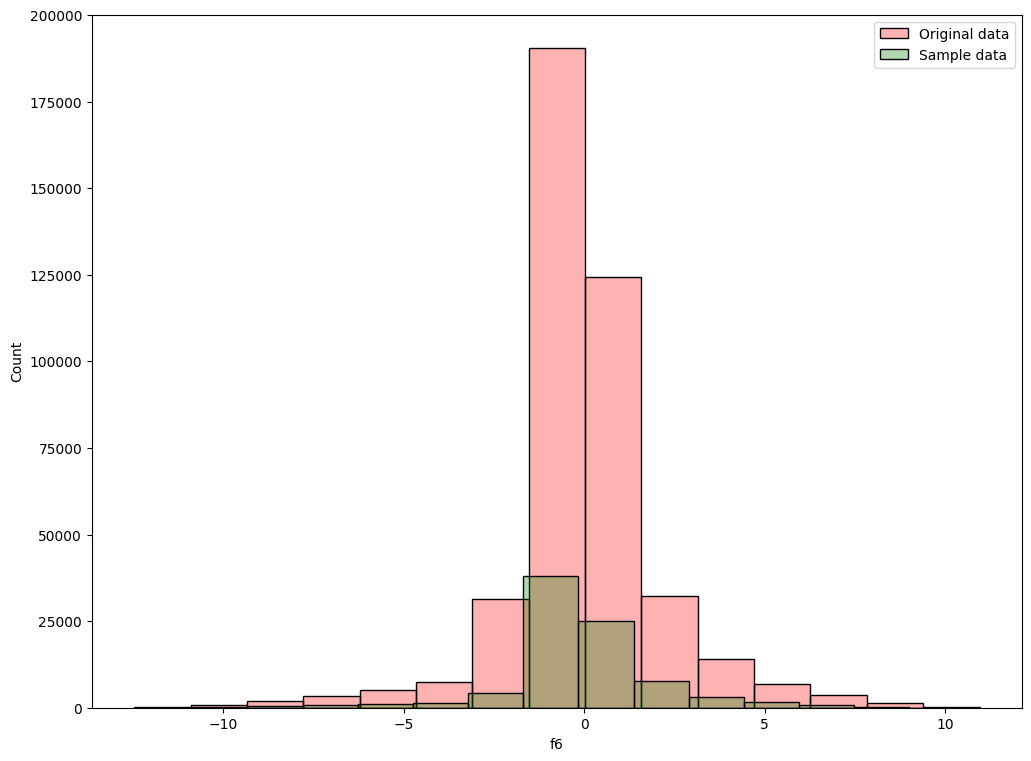

In [42]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=tps_df, x="f6", label="Original data", color="red", alpha=0.3, bins=15
)
sns.histplot(
    data=sample_df, x="f6", label="Sample data", color="green", alpha=0.3, bins=15
)

plt.legend()
plt.show();

As you can see, the distributions are roughly the same — you can even compare the variances to check.

Now, you can use this sample for rapid prototyping, experimenting, building a model validation strategy, and so on.

# Use vectorization instead of loops

Whenever you find yourself itching to use some looping function like apply, applymap, or itertuples - stop. Use vectorization instead.

First, start thinking about DataFrame columns as giant n-dimensional vectors. As you know, vector operations affect each element in the vector simultaneously removing the need for loops in math. Vectorization is the process of executing operations on arrays rather than individual scalars.

Pandas has a large collection of vectorized functions. In fact, virtually any function and operator with the ability to affect each element in the array is vectorized in pandas. These functions are orders of magnitude faster than anything that loops.

You can also define custom vectorized preprocessing functions that accept whole DataFrame columns as vectors rather than scalars. The hairy details of this are beyond the scope of this article. Why don’t you check out this awesome guide?

# Choose a machine learning library for baseline models or prototypes

Machine learning is an iterative process. When dealing with large datasets, you have to make sure each iteration is as fast as possible. You want to build baselines, develop a validation strategy, check if different feature engineering ideas improve the baseline, and so on.

At this stage, don’t use models in Sklearn because they are CPU-only. Choose from XGBoost, LightGBM or CatBoost. And here is the surprising fact — XGBoost is much slower than the other two, even on GPUs.

It is up to 10 times slower than LightGBM. CatBoost beats both libraries, and the speed difference grows rapidly as the dataset size gets bigger. It also regularly outperforms them in terms of accuracy.

These speed differences become much more pronounced when you are running multiple experiments, cross-validating, or hyperparameter tuning.



# Miscellaneous tips
Use Cython (C Python) — usually, it is up to 100 times faster than pure Python. Check out this section of the Pandas documentation.

If you really have to loop, decorate your custom functions with @numba.jit after installing Numba. JIT (just-in-time) compilation converts pure Python to native machine instructions, enabling you to achieve C, C++, and Fortran-like speeds. Again, check this section from the docs.

Search for alternatives other than CSV files for storage. File formats like feather, parquet, and jay are lighting fast — it only takes seconds to load billion-row datasets if stored in these.

Read the Pandas documentation on enhancing performance and scaling to large datasets.